In [2]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017")
db = client.test

In [3]:
# Jieba 斷詞工具

import jieba
jieba.set_dictionary('dict.txt.big')

In [4]:
seg_list = jieba.cut("晚一點我們去吃大餐好嗎？")
print(", ".join(seg_list))

Building prefix dict from /Users/Kent/src/Chinese_lyrics_analysis/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /Users/Kent/src/Chinese_lyrics_analysis/dict.txt.big ...
Loading model from cache /var/folders/qh/ym0qcw3d6w3_1hnkqf7xzxt40000gn/T/jieba.uaba23d6c739911e208dcbd05db062e96.cache
DEBUG:jieba:Loading model from cache /var/folders/qh/ym0qcw3d6w3_1hnkqf7xzxt40000gn/T/jieba.uaba23d6c739911e208dcbd05db062e96.cache
Loading model cost 0.899 seconds.
DEBUG:jieba:Loading model cost 0.899 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


晚一點, 我們, 去, 吃, 大餐, 好, 嗎, ？


In [13]:
cursor = db.lyrics.find({'artist': '張學友'})
whole_lyrics = "".join([document['lyrics'] for document in cursor])
token_list = [token for token in jieba.cut(whole_lyrics)]

def filter_rule_1(input):
    return True if len(input.strip()) > 1 else False

def filter_rule_2(input):
    return False if input.isdigit() else True

def filter_rule_3(input):
    return False if input in [u"作詞",u"作曲",u"歌詞",u"編曲", "Repeat", "you", u"魔鏡", u"歌詞網", u"詳盡"] else True

token_list = filter(filter_rule_1, token_list)
token_list = filter(filter_rule_2, token_list)
token_list = filter(filter_rule_3, token_list)


from collections import Counter
counter = Counter(token_list)

for t in counter.most_common(20):
    print("%s: %s" % (t[0], t[1]))
    
    

沒有: 312
一生: 262
一個: 255
知道: 248
一天: 218
自己: 203
一切: 203
永遠: 190
不會: 184
心中: 182
什麼: 180
一起: 179
愛情: 174
世界: 169
我心: 164
為何: 162
不再: 162
仍然: 156
不想: 151
故事: 151


In [14]:
%matplotlib inline

from wordcloud import WordCloud
import matplotlib.pyplot as plt

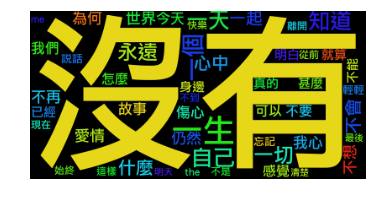

In [15]:
wordcloud = WordCloud(
    font_path="/Library/Fonts/儷黑 Pro.ttf", background_color="black"
).fit_words(counter.most_common(50))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()